In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image

#### 定义minmax标准化函数

In [2]:
def norm_fun(x):
    return (x - x.min()) / (x.max() - x.min())

### 制作数据集

#### 倒入数据

In [3]:
path = '/data/liaohx/DDIM4CineSR/raw_dataset/'
train_hr_files = np.load(path + 'ACDCtrain_HR_100_new.npz')
train_lr_files = np.load(path + 'ACDCtrain_LR_100_new.npz')
test_hr_files = np.load(path + 'ACDCtest_HR_50_new.npz')
test_lr_files = np.load(path + 'ACDCtest_LR_50_new.npz')

#### 制作训练数据集，并完成通道拼接

In [4]:
arr_list = []
for arr_name in train_hr_files.files:  # arr_name 为字符串格式
    hr_sample = train_hr_files[arr_name].swapaxes(0, 1)  # 将slice维度和temporal维度进行交换
    lr_sample = train_lr_files[arr_name].swapaxes(0, 1)
    for slice in range(hr_sample.shape[0]):
        normed_hr = norm_fun(hr_sample[slice])
        normed_lr = norm_fun(lr_sample[slice])
        for t in range(normed_hr.shape[0]):
            arr_list.append(np.vstack([normed_lr[t], normed_hr[t]]).reshape(2,128,128))

In [5]:
training_data_arr = np.array(arr_list)
print(training_data_arr.shape)

(25351, 2, 128, 128)


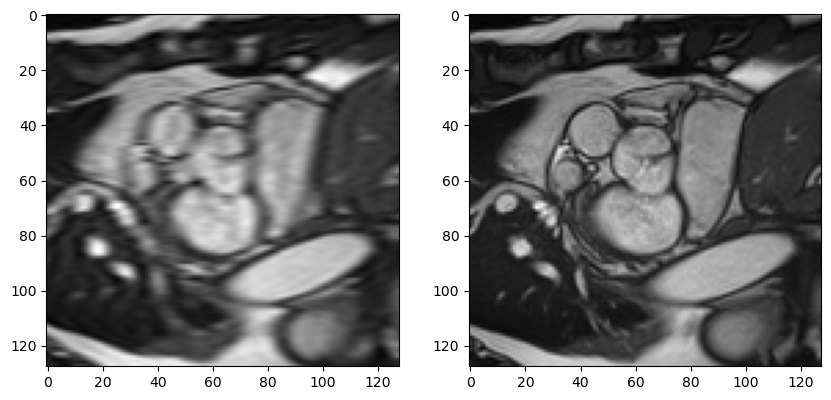

In [6]:
idx = 11
sample1 = training_data_arr[idx]
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(sample1[0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(sample1[1], cmap='gray')

In [7]:
np.save('/data/liaohx/DDIM4CineSR/training_dataset/training_data_pairs.npy', training_data_arr)

## 制作训练数据集

In [ ]:
test_hr_files.files[0]+'.npy'

In [9]:
idx = 0
for arr_name in test_hr_files.files:  # arr_name 为字符串格式
    hr_sample = test_hr_files[arr_name].swapaxes(0, 1)  # 将slice维度和temporal维度进行交换
    lr_sample = test_lr_files[arr_name].swapaxes(0, 1)
    for slice in range(hr_sample.shape[0]):
        normed_hr = norm_fun(hr_sample[slice])  # 对整张cine归一化到0-1之间
        normed_lr = norm_fun(lr_sample[slice])
        hr_gif_list = []
        lr_gif_list = []
        np.save(f'/data/liaohx/DDIM4CineSR/testing_dataset/HR/array/{idx}.npy',normed_hr)
        np.save(f'/data/liaohx/DDIM4CineSR/testing_dataset/LR/array/{idx}.npy',normed_lr)
        for t in range(normed_hr.shape[0]):
            hr_gif_list.append(Image.fromarray(normed_hr[t]*255))
            lr_gif_list.append(Image.fromarray(normed_lr[t]*255))
        hr_gif_list[0].save(f'/data/liaohx/DDIM4CineSR/testing_dataset/HR/gif/{idx}.gif',save_all = True,append_images=hr_gif_list[1:],optimize=True,duration=100,loop=0)
        lr_gif_list[0].save(f'/data/liaohx/DDIM4CineSR/testing_dataset/LR/gif/{idx}.gif',
                            save_all = True,append_images=lr_gif_list[1:],optimize=True,duration=100,loop=0)
        idx += 1

#### 导入检查测试集数据

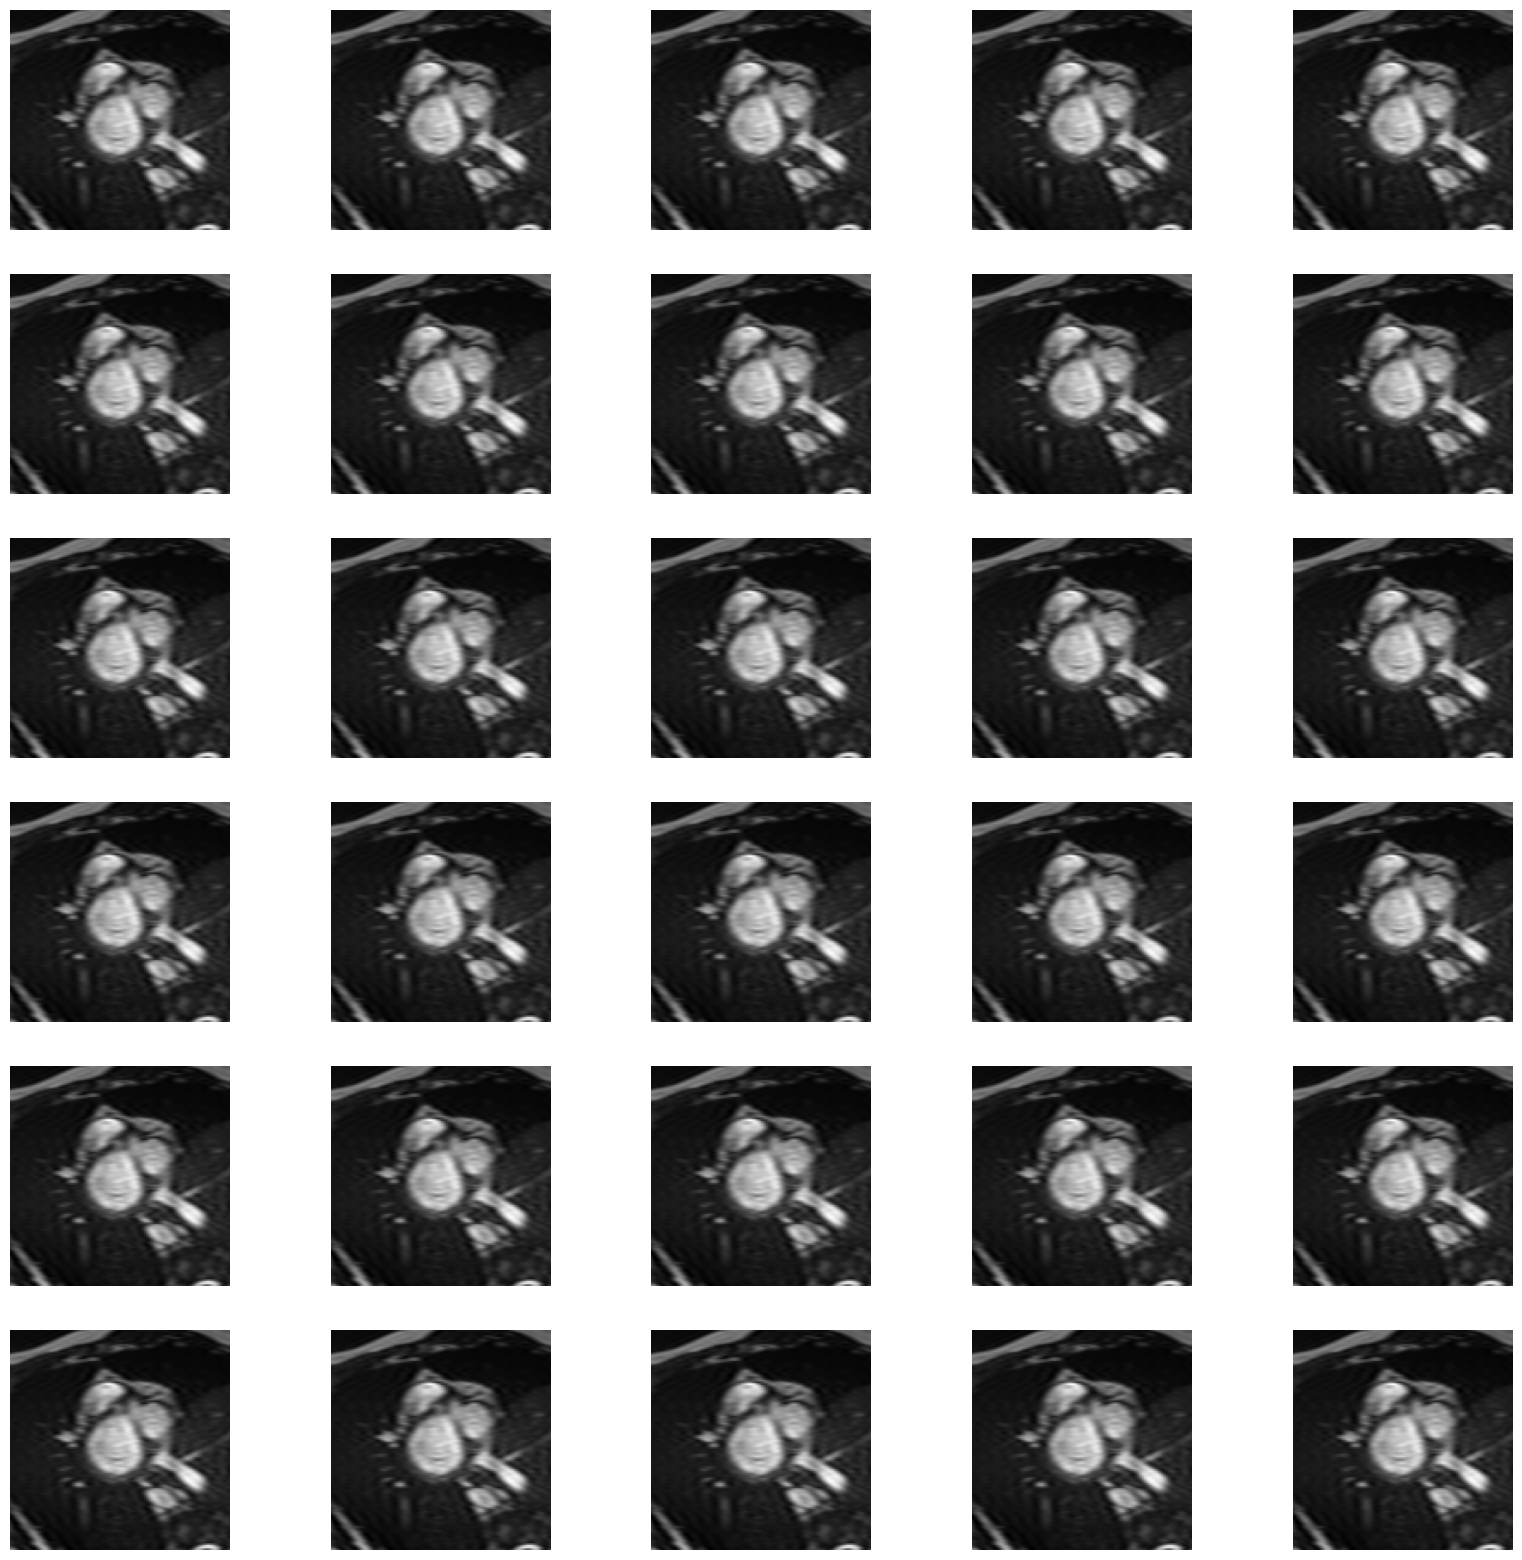

In [10]:
testsample = np.load('/data/liaohx/DDIM4CineSR/testing_dataset/LR/array/0.npy')
plt.figure(figsize=(20, 20))
rows = testsample.shape[0] // 5
for i in range(testsample.shape[0]):
    plt.subplot(rows, 5, i+1)
    plt.imshow(testsample[0], cmap='gray')
    plt.axis('off')

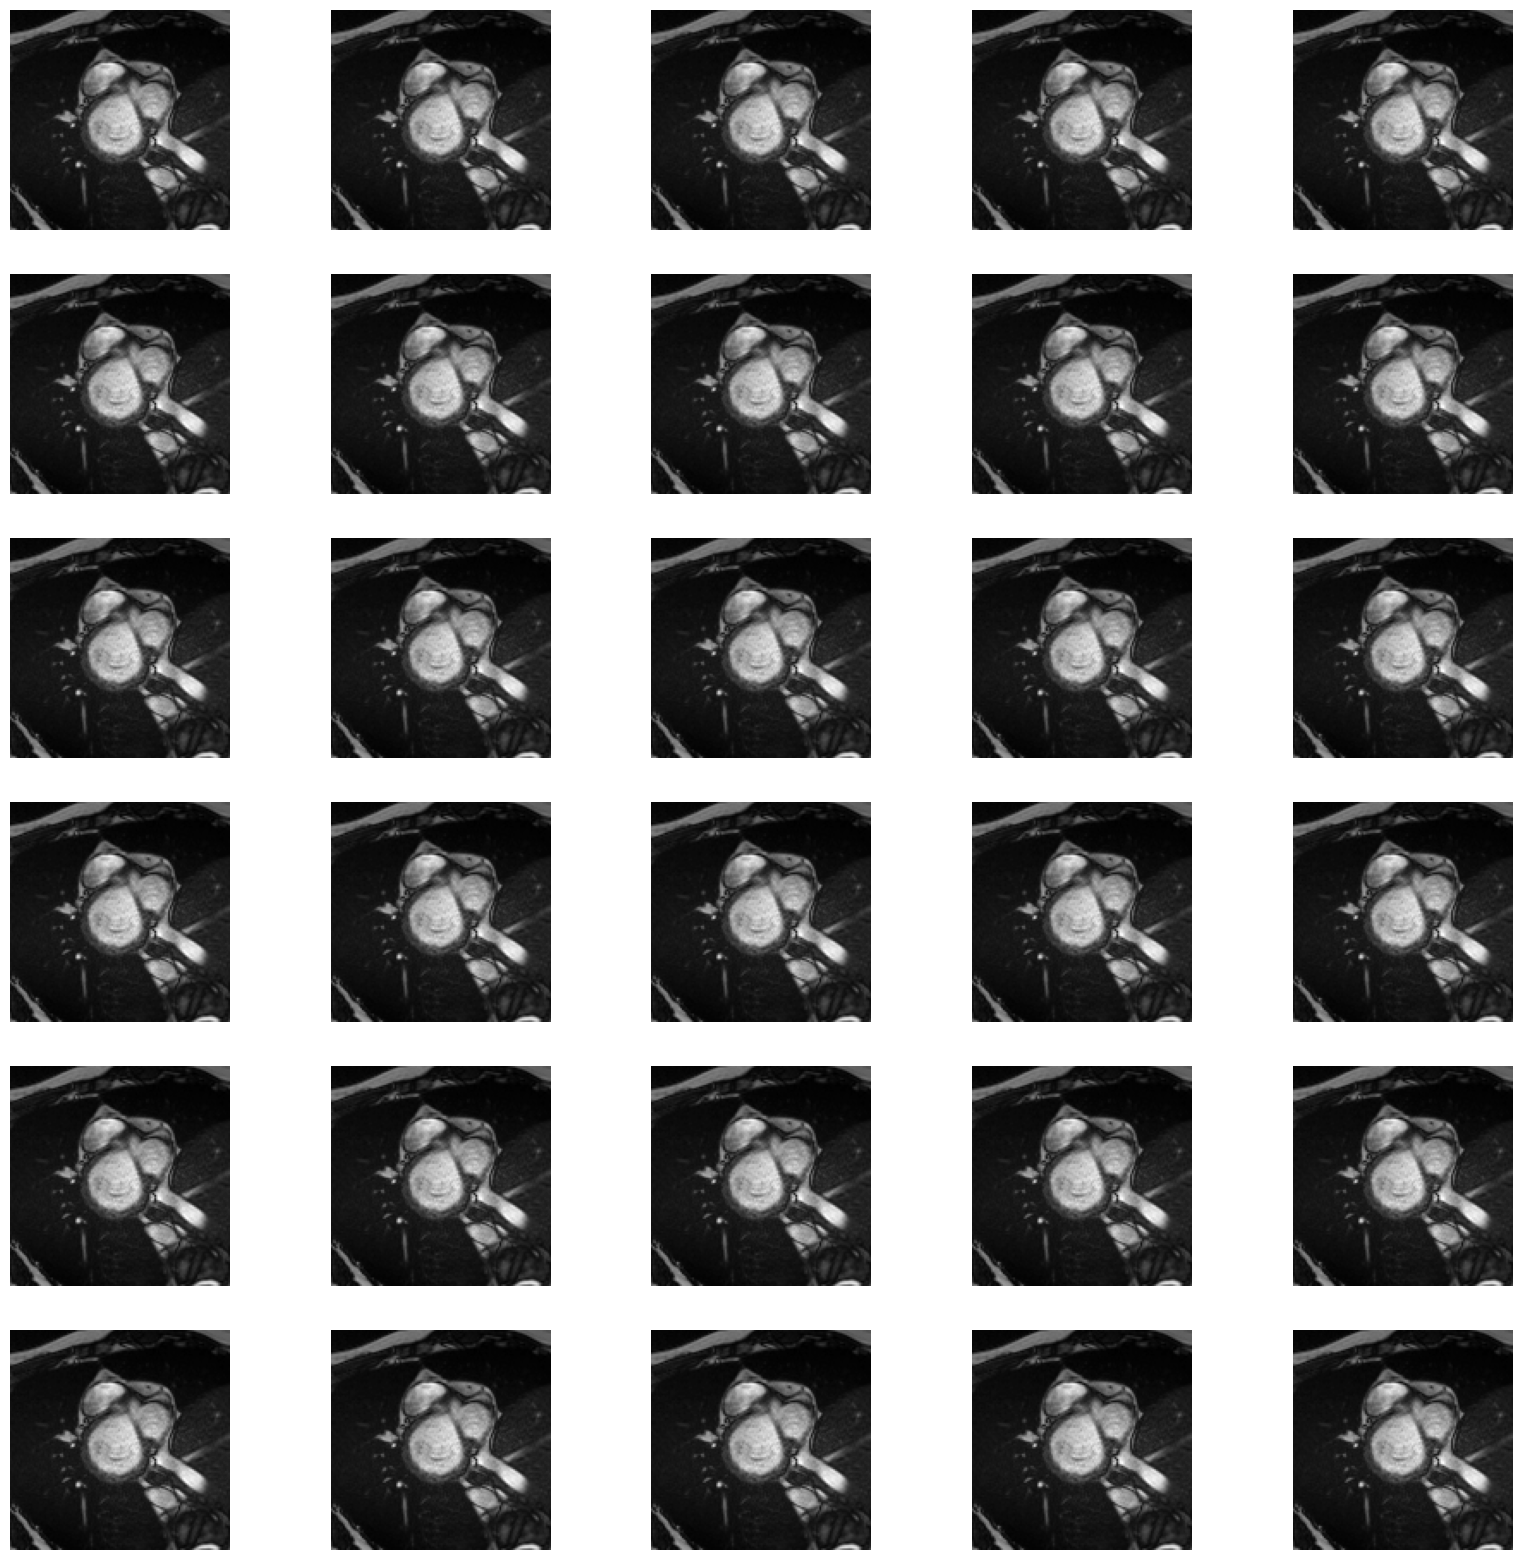

In [11]:
testsample = np.load('/data/liaohx/DDIM4CineSR/testing_dataset/HR/array/0.npy')
plt.figure(figsize=(20, 20))
rows = testsample.shape[0] // 5
for i in range(testsample.shape[0]):
    plt.subplot(rows, 5, i+1)
    plt.imshow(testsample[0], cmap='gray')
    plt.axis('off')

In [2]:
psnr = np.load('/data/liaohx/DDIM4CineSR/testing_dataset/SR/psnr_score.npy')
ssim = np.load('/data/liaohx/DDIM4CineSR/testing_dataset/SR/ssim_score.npy')

In [3]:
print(np.mean(psnr), np.mean(ssim))

27.135389660186693 0.8314784201811964


In [4]:
print(np.var(psnr), np.var(ssim))

5.40430762056007 0.0018710217769882208
